## Import statements

In [1]:
import os, sys
import random
import time

#selenium libraries
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException   
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import UnexpectedAlertPresentException
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pyautogui
import datetime
import wget


import numpy as np
from PIL import Image
from numpy import asarray
import glob
import matplotlib.pyplot as plt
from tensorflow import keras
from PIL import Image
from numpy import asarray
import image_slicer
from utils import *

## Loading Model trained on Kaggle

In [2]:
model = keras.models.load_model('/Users/benji/Desktop/UTC/GI01/captchas/ResNet50')

In [3]:
def resolve_captchaV1(driver):
    """
    Resolves the captcha using an image classification approach
    
    Arguments:
    driver -- Selenium webdriver controlling the captcha windows 
    """
    
    # Retrieve captcha description
    challenge_desc = driver.find_element_by_xpath("/html/body/div/div/div[2]/div[1]/div[1]")
    challenge_labels, challenge_type = process(challenge_desc.text)
    print("Captcha Description :\n" + '"' + challenge_desc.text + '"\n')
    print("Labels :", challenge_labels)


    # Download main image challenge
    img_url = driver.find_element_by_xpath("/html/body/div/div/div[2]/div[2]/div/table/tbody/tr[1]/td[3]/div/div[1]/img").get_attribute("src")
    img_filename = wget.download(img_url)
    #print(f"Image Successfully Downloaded: {img_filename}\n" )

    # Slice the image according to the captcha grid
    img = Image.open('payload')
    width, height = img.size
    #print(f"The image is {width}x{height}px\n")

    img_nb = 3 if width == 300 else 4
    image_slicer.slice('payload', img_nb**2)

    # Resize all images
    for filename in glob.iglob('**/*.png', recursive=True):
        im = Image.open(filename)
        imResize = im.resize((100,100), Image.ANTIALIAS)
        imResize.save(filename , 'png', quality=90)
        
    # Remove original image
    os.remove('payload')

    # make predictions for each image
    preds = pred(model, challenge_labels, grid_size=img_nb).reshape((img_nb,img_nb))
    print(preds)

    # click on the right images
    clicked = submit_images(preds)
    #print("clicked :",clicked)

    # Verify new images
    if challenge_type == 'Click verify once there are none left':

        # while new images appear
        while clicked != []:

            delay(5)

            new_folder = 'captcha'
            if not os.path.exists(new_folder):
                os.makedirs(new_folder)

            os.chdir(new_folder)

            # Download the new images
            for current_img in clicked:
                x_grid, y_grid = current_img
                img_url = driver.find_element_by_xpath("/html/body/div/div/div[2]/div[2]/div/table/tbody/tr[" + str(x_grid) + "]/td[" + str(y_grid) + "]/div/div[1]/img").get_attribute("src")            
                img_filename = wget.download(img_url)
                os.rename(img_filename, img_filename + '_0' + str(x_grid) + '_0' + str(y_grid) + '.png') # rename to match the previous names structure

            # Making predictions for the new images
            preds = pred(model, challenge_labels, grid_size=img_nb)
            print(preds)

            clicked = submit_images(preds)
            #print("clicked :",clicked)


    # Click on the verify button
    validate()

[WDM] - ====== WebDriver manager ======


[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Driver [/Users/benji/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


cars
Captcha Description :
"Select all images with
cars
Click verify once there are none left"

Labels : ['car']


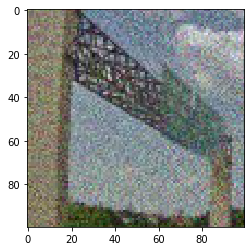

prediction : [[8.0557740e-01 1.8926935e-03 3.5566490e-03 1.5923979e-02 4.4143444e-04
  2.6902073e-04 5.0325732e-04 2.2398259e-02 5.9213044e-06 1.4331542e-01
  3.2125486e-04 4.6714121e-03 1.1232981e-03]]
prediction.shape : (1, 13)
argsort : 0
bicycle 


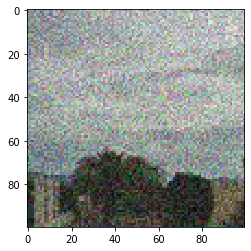

prediction : [[2.3798719e-05 1.8187877e-02 2.0684487e-04 4.9240317e-02 2.7564289e-03
  1.1590719e-05 3.8183424e-07 6.0237926e-06 9.9948506e-05 9.1674978e-01
  8.7419030e-04 7.5407181e-05 1.1767411e-02]]
prediction.shape : (1, 13)
argsort : 9
other 


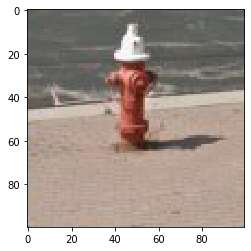

prediction : [[6.8943893e-07 7.7180389e-12 6.9650255e-08 2.6301930e-07 3.8903230e-12
  1.2410788e-08 9.9999881e-01 2.4222283e-08 2.0363336e-13 2.7560441e-08
  3.2817063e-10 4.1314882e-10 2.1093108e-08]]
prediction.shape : (1, 13)
argsort : 6
a fire hydrant 


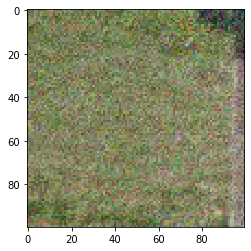

prediction : [[7.2858552e-03 4.2010190e-05 9.2104205e-04 2.0009618e-02 4.2838070e-07
  4.4460519e-04 6.9325320e-02 7.4603134e-03 9.1393413e-06 8.9375079e-01
  5.9446448e-04 9.9885539e-05 5.6433768e-05]]
prediction.shape : (1, 13)
argsort : 9
other 


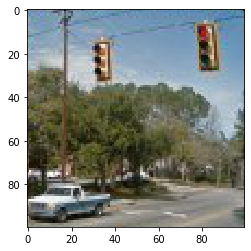

prediction : [[3.69128145e-07 1.29113294e-04 9.79528064e-04 4.57503110e-01
  4.23657287e-09 1.05688594e-01 6.34000571e-07 1.92890593e-06
  1.12365476e-14 2.22448921e-06 3.62060237e-04 8.77683526e-09
  4.35332388e-01]]
prediction.shape : (1, 13)
argsort : 3
car 


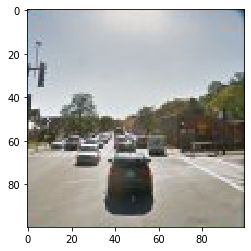

prediction : [[2.07686321e-06 1.43279124e-03 1.11009802e-04 9.83655691e-01
  1.81726991e-05 1.90961501e-03 5.89494604e-08 2.25836902e-06
  1.01468842e-08 1.31019636e-03 4.75123670e-04 2.28579069e-07
  1.10828085e-02]]
prediction.shape : (1, 13)
argsort : 3
car 


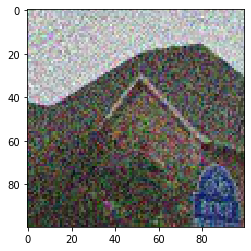

prediction : [[1.6395596e-04 7.9971328e-03 1.1613447e-03 4.1630507e-02 8.8063650e-02
  1.1630306e-03 7.0114402e-06 6.6576074e-05 7.2316936e-05 8.5395825e-01
  8.2665245e-04 2.5005643e-03 2.3890070e-03]]
prediction.shape : (1, 13)
argsort : 9
other 


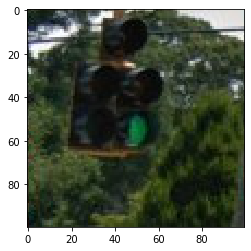

prediction : [[7.2837996e-05 4.2136086e-04 2.6397161e-05 7.2548082e-03 4.0726882e-05
  4.1932044e-06 3.2728527e-05 8.1331083e-05 1.1908832e-06 1.0118053e-02
  1.1888890e-03 5.5922879e-05 9.8070163e-01]]
prediction.shape : (1, 13)
argsort : 12
traffic light 


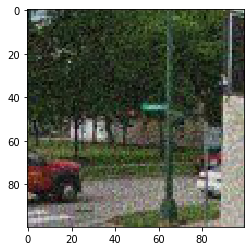

prediction : [[3.2011534e-03 3.4838414e-03 3.5655919e-02 8.8790947e-01 4.7019010e-05
  9.2047341e-03 1.9693514e-04 6.3203210e-03 2.3939157e-07 2.7801577e-02
  8.4168343e-03 5.7204615e-04 1.7189894e-02]]
prediction.shape : (1, 13)
argsort : 3
car 
[[0. 0. 0.]
 [0. 1. 1.]
 [0. 0. 1.]]


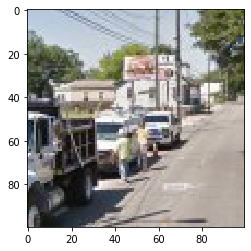

prediction : [[2.3976006e-03 1.0436914e-02 1.4494772e-01 6.6186845e-01 1.5345463e-04
  1.2740217e-01 8.5036536e-06 1.2222166e-02 2.6756335e-09 3.2545961e-03
  3.6029425e-03 5.7571116e-05 3.3647932e-02]]
prediction.shape : (1, 13)
argsort : 3
car 


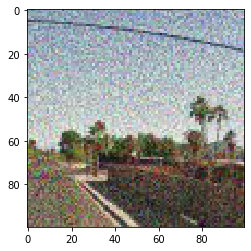

prediction : [[4.40226460e-04 5.44187031e-04 5.84143493e-03 1.07472874e-01
  1.03388866e-03 8.60373117e-03 3.03810393e-05 9.84145809e-05
  1.28127125e-04 1.18842639e-01 9.03581902e-02 2.66657257e-03
  6.63939416e-01]]
prediction.shape : (1, 13)
argsort : 12
traffic light 


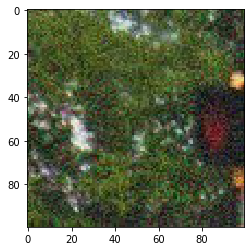

prediction : [[2.5960670e-03 1.1096667e-03 1.4703064e-03 5.2810185e-02 3.9662342e-04
  1.5600224e-04 6.4790173e-04 1.0720941e-03 1.5513136e-04 1.7286232e-01
  1.7212154e-02 1.4976537e-03 7.4801391e-01]]
prediction.shape : (1, 13)
argsort : 12
traffic light 
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


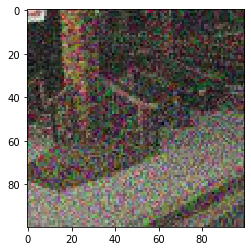

prediction : [[4.4495407e-02 8.8587985e-04 2.1453245e-04 6.3789496e-03 5.3817614e-05
  3.4365989e-04 2.8979948e-05 2.6974556e-04 3.6342308e-07 5.9425813e-01
  8.3430024e-04 3.4727061e-01 4.9656858e-03]]
prediction.shape : (1, 13)
argsort : 9
other 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Please try again.
bus
Captcha Description :
"Select all images with a
bus
Click verify once there are none left."

Labels : ['bus']


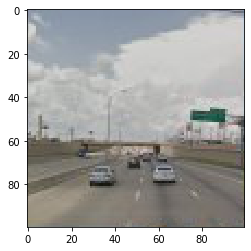

prediction : [[2.2913888e-05 8.2162181e-03 2.7316832e-03 9.8666292e-01 1.6485337e-06
  8.9432258e-05 1.8897225e-07 6.6528577e-05 1.1959467e-09 1.1262607e-04
  2.2169109e-04 8.1629668e-07 1.8732438e-03]]
prediction.shape : (1, 13)
argsort : 3
car 


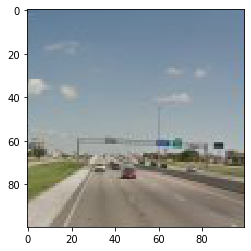

prediction : [[2.8406453e-06 5.9451221e-04 8.3677296e-05 9.1631126e-01 3.9589660e-05
  7.5645006e-04 1.9357389e-08 4.7900862e-06 3.1839076e-07 1.5723102e-02
  3.2600635e-04 3.5693954e-06 6.6153809e-02]]
prediction.shape : (1, 13)
argsort : 3
car 


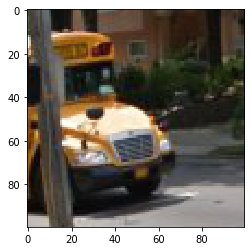

prediction : [[1.5406347e-05 5.8091259e-06 6.5055877e-01 3.3288765e-01 5.3725985e-10
  4.9799026e-05 2.6804342e-05 2.3661212e-06 1.7900889e-13 1.3459311e-04
  2.4130131e-05 3.0452946e-05 1.6264152e-02]]
prediction.shape : (1, 13)
argsort : 2
bus 


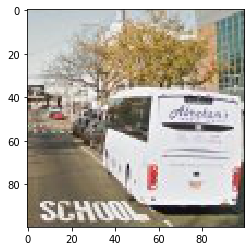

prediction : [[1.1361294e-02 8.7974785e-04 7.9248810e-01 1.7400719e-01 5.7681154e-06
  7.0735514e-03 1.5121070e-04 2.9594891e-04 4.3580306e-10 8.4416410e-03
  2.9558194e-04 4.5184032e-03 4.8157151e-04]]
prediction.shape : (1, 13)
argsort : 2
bus 


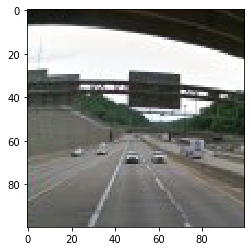

prediction : [[4.42157261e-06 9.47668612e-01 2.66456800e-06 5.18717021e-02
  2.20891692e-07 2.48627384e-06 4.39590409e-08 1.93156393e-05
  1.13548206e-10 4.84199654e-06 8.35451556e-06 1.07614073e-09
  4.17363626e-04]]
prediction.shape : (1, 13)
argsort : 1
bridge 


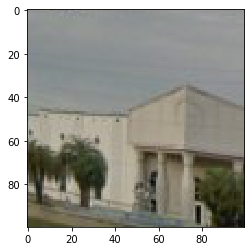

prediction : [[3.1358311e-03 2.1486940e-02 5.2614871e-04 1.7543818e-01 3.8869900e-03
  6.6552330e-03 6.6559493e-05 5.7806330e-05 2.8618721e-03 6.8373489e-01
  4.5989495e-02 9.4580138e-04 5.5214152e-02]]
prediction.shape : (1, 13)
argsort : 9
other 


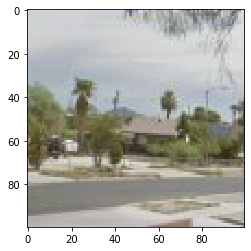

prediction : [[3.1930515e-05 1.1747908e-04 5.9915470e-05 3.6837481e-02 5.5285991e-04
  8.1938609e-02 2.0779069e-05 9.6147062e-07 1.5761729e-03 1.5490867e-01
  7.1271122e-01 1.5279873e-04 1.1091201e-02]]
prediction.shape : (1, 13)
argsort : 10
palm tree 


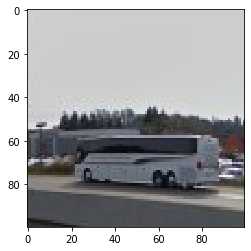

prediction : [[7.7160144e-07 9.0229310e-05 9.9768233e-01 1.9678560e-03 1.6965166e-07
  1.3670775e-04 3.3346932e-08 2.3051694e-08 3.6267460e-13 6.1798448e-05
  5.0974850e-05 7.8947619e-07 8.3600808e-06]]
prediction.shape : (1, 13)
argsort : 2
bus 


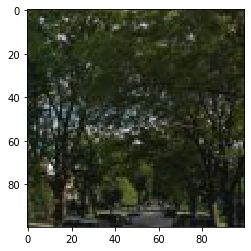

prediction : [[1.5173509e-02 4.9905962e-04 1.7297550e-04 2.0764002e-01 2.3759151e-06
  2.5173501e-04 2.9596767e-05 3.5363086e-03 1.1075668e-06 7.6862907e-01
  2.6329008e-03 9.0051821e-04 5.3077145e-04]]
prediction.shape : (1, 13)
argsort : 9
other 
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


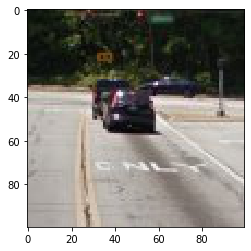

prediction : [[3.3314112e-03 2.5342940e-04 9.5843128e-04 9.5951283e-01 7.6477455e-08
  1.5176124e-02 5.3340282e-05 1.7364012e-02 2.4620275e-10 3.0664536e-03
  3.8969727e-05 5.0360886e-05 1.9454950e-04]]
prediction.shape : (1, 13)
argsort : 3
car 


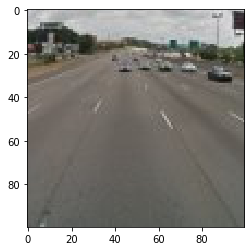

prediction : [[6.0032158e-05 1.6293708e-02 1.6052092e-03 9.0081829e-01 4.1559092e-06
  5.4533895e-05 1.7412858e-06 6.0829530e-05 3.9185414e-07 7.9240374e-02
  2.5065168e-04 2.4815263e-06 1.6076511e-03]]
prediction.shape : (1, 13)
argsort : 3
car 


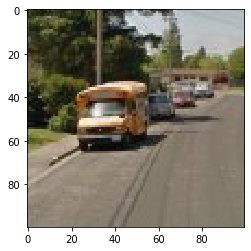

prediction : [[3.4737870e-05 2.0341290e-06 9.9563134e-01 4.0626712e-03 5.5195066e-09
  5.4356224e-06 2.0901580e-06 2.1278611e-06 6.4157054e-14 8.0123191e-06
  1.4235315e-04 6.9681378e-06 1.0217597e-04]]
prediction.shape : (1, 13)
argsort : 2
bus 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]


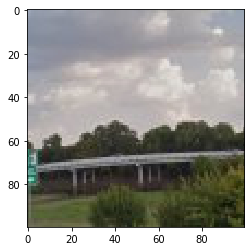

prediction : [[2.4295722e-04 2.3323995e-01 3.3351392e-03 5.8985669e-02 1.5206725e-03
  9.4231924e-05 2.1918637e-05 1.1195264e-05 2.5493151e-03 6.8893510e-01
  3.3408881e-03 9.9402398e-04 6.7290175e-03]]
prediction.shape : (1, 13)
argsort : 9
other 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Please try again.
bus
Captcha Description :
"Select all images with a
bus
Click verify once there are none left."

Labels : ['bus']


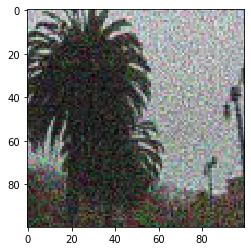

prediction : [[1.0404555e-02 6.2876916e-03 3.6595526e-04 1.1279652e-02 4.8283529e-03
  2.4146955e-05 7.0459850e-05 2.3984832e-03 7.4526964e-05 2.1210027e-01
  8.7669097e-02 1.5807963e-03 6.6291606e-01]]
prediction.shape : (1, 13)
argsort : 12
traffic light 


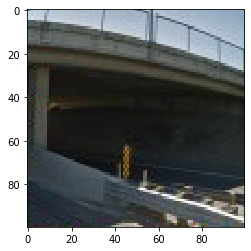

prediction : [[3.1018758e-06 9.5731354e-01 1.3760121e-04 4.1866392e-02 9.8579905e-05
  1.3171951e-04 4.6366304e-07 1.1591101e-05 2.1368749e-08 1.7802606e-04
  4.1393698e-05 3.8364598e-07 2.1731130e-04]]
prediction.shape : (1, 13)
argsort : 1
bridge 


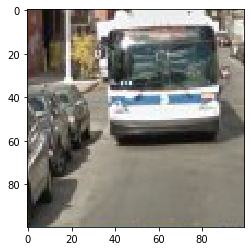

prediction : [[3.6564274e-04 1.7939517e-04 3.6984023e-02 9.6217299e-01 7.6823259e-09
  5.7091265e-06 6.2801232e-06 1.7860481e-04 4.1495258e-12 6.7263885e-05
  1.1170254e-05 2.2909842e-05 6.0421912e-06]]
prediction.shape : (1, 13)
argsort : 3
car 


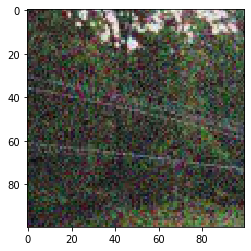

prediction : [[1.4863866e-02 1.3552393e-01 5.3754067e-03 3.3596128e-02 3.0843250e-03
  3.2271791e-04 1.2091337e-04 3.3373972e-03 1.7436294e-05 7.0606291e-01
  1.3841117e-02 7.4255943e-02 9.5978947e-03]]
prediction.shape : (1, 13)
argsort : 9
other 


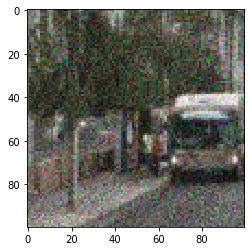

prediction : [[7.20960379e-05 1.58776163e-06 9.87359822e-01 1.23384492e-02
  3.22854438e-10 1.15240015e-04 6.60472040e-07 9.09081064e-06
  3.90505440e-15 4.19102726e-05 5.85477355e-05 2.97735539e-07
  2.28938097e-06]]
prediction.shape : (1, 13)
argsort : 2
bus 


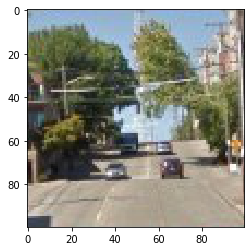

prediction : [[1.5273326e-05 1.6218347e-04 3.3081688e-03 9.5615286e-01 7.6732671e-05
  9.1871142e-04 5.3662546e-08 3.8741957e-04 9.8206177e-10 2.9028563e-03
  9.4210999e-03 1.0454972e-05 2.6644275e-02]]
prediction.shape : (1, 13)
argsort : 3
car 


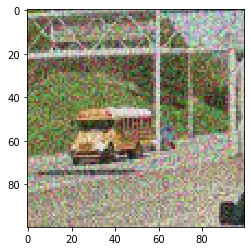

prediction : [[1.0612765e-09 1.1820508e-09 9.9999821e-01 9.5508608e-07 3.6286786e-14
  4.4938687e-08 1.2465915e-08 3.1618254e-12 6.0226473e-22 1.7377070e-08
  7.5335373e-07 5.8742962e-11 8.8332870e-09]]
prediction.shape : (1, 13)
argsort : 2
bus 


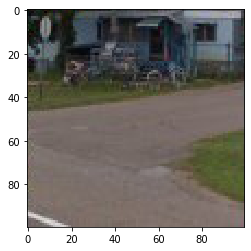

prediction : [[8.4641743e-01 2.2204153e-02 1.5669621e-03 2.2587765e-02 2.4928268e-06
  2.5561601e-05 4.4097906e-04 8.9176103e-02 7.8843051e-08 1.7195238e-02
  1.0694616e-04 2.3719080e-04 3.9112994e-05]]
prediction.shape : (1, 13)
argsort : 0
bicycle 


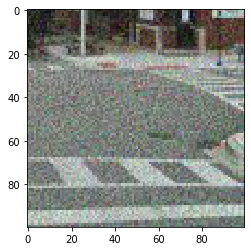

prediction : [[3.2827549e-05 8.6158288e-05 6.9902519e-05 1.4285016e-03 1.1758137e-06
  9.7256845e-01 3.9561121e-05 2.2679646e-06 2.0902576e-08 2.5408009e-02
  6.9140588e-05 2.1529479e-04 7.8690035e-05]]
prediction.shape : (1, 13)
argsort : 5
crosswalk 
[[0. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


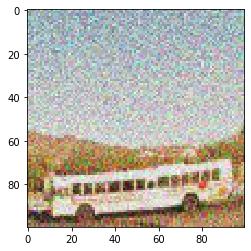

prediction : [[3.3408674e-07 1.3118316e-04 9.9769199e-01 4.9544376e-04 1.1342950e-05
  3.8391408e-05 4.8589985e-08 2.5572262e-09 3.6314463e-13 1.4827889e-03
  9.4434887e-05 7.1693911e-08 5.3960201e-05]]
prediction.shape : (1, 13)
argsort : 2
bus 


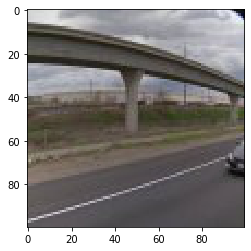

prediction : [[1.0566079e-06 9.4723940e-01 2.8146682e-05 5.2608941e-02 6.6689518e-07
  5.7446032e-06 2.6595399e-07 3.0449394e-06 5.5250706e-09 3.3362143e-05
  9.4832258e-06 3.8164494e-08 6.9763963e-05]]
prediction.shape : (1, 13)
argsort : 1
bridge 
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


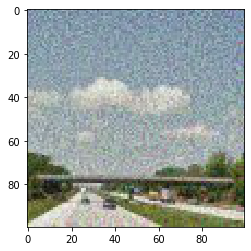

prediction : [[1.7235889e-05 7.9306734e-01 1.4798908e-04 2.0046446e-02 1.3043934e-04
  1.0073223e-05 8.6595742e-07 7.6885550e-07 1.7526963e-03 1.8225242e-01
  3.4258497e-04 1.0025055e-05 2.2210635e-03]]
prediction.shape : (1, 13)
argsort : 1
bridge 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Click verify once there are none left.


In [4]:
working_dir = '/Users/benji/Desktop/UTC/GI01/captchas/new_captcha/'
os.chdir(working_dir)

# Create new folder to store images of the new captcha 
current_time = datetime.datetime.now().strftime("%Hh%Mm%S")
new_folder = 'captcha_' + current_time 
if not os.path.exists(new_folder):
    os.makedirs(new_folder)

os.chdir(new_folder)

# Launch Chrome with Selenium
driver = webdriver.Chrome(ChromeDriverManager().install())
delay()

pyautogui.hotkey('command', 'shiftright', 'up') # make it full screen (personal keyboard shortcut)

# Go to reCAPTCHA website
driver.get("https://benji2264.github.io/heli_captcha_solver/index.html")

# Switch to reCAPTCHA frame
frames = driver.find_elements_by_tag_name("iframe")
driver.switch_to.frame(frames[0]);
delay()

# Click on checkbox to activate reCAPTCHA
driver.find_element_by_class_name("recaptcha-checkbox-border").click()
delay()

# Switch to reCAPTCHA challenge frame
driver.switch_to.default_content()
frames = driver.find_elements_by_tag_name("iframe")
driver.switch_to.frame(frames[2]);
delay()

resolve_captchaV1(driver)

# Check the error message
delay(1)
error_msg = driver.find_element_by_xpath("/html/body/div/div/div[2]").text.split('\n')[-1]
print(error_msg)

while (error_msg == 'Please try again.') or (error_msg == 'Please select all matching images.') or (error_msg == 'Please also check the new images.'):
    
    if error_msg == 'Please try again.':
        resolve_captchaV1(driver)
        delay(1)
        error_msg = driver.find_element_by_xpath("/html/body/div/div/div[2]").text.split('\n')[-1]
        print(error_msg)
        
    elif error_msg == 'Please select all matching images.':
        # TODO : choose the most likely image among the new images
        print(error_msg)
        break